In [10]:
import pandas as pd
import numpy as np
import re

In [11]:
data=pd.read_csv("meal_order_detail.csv",encoding='gbk')
data1=pd.read_csv("meal_order_info.csv",encoding='gbk')

In [12]:
data2=data['dishes_name'].drop_duplicates()
dishes_name=[]
for i in range(len(data2)):
    name=data2.iloc[i].strip()
    dishes_name.append(name)
print(dishes_name)

['西瓜胡萝卜沙拉', '麻辣小龙虾', '农夫山泉NFC果汁100%橙汁', '番茄炖牛腩', '白饭/小碗', '凉拌菠菜', '芝士烩波士顿龙虾', '姜葱炒花蟹', '水煮鱼', '百里香奶油烤紅酒牛肉', '香菇鹌鹑蛋', '拌土豆丝', '焖猪手', '53度茅台', '路易拉菲红酒干红', '意文柠檬汁', '蛋挞', '黄油曲奇饼干', '白饭/大碗', '香菇鸡肉粥', '哈尔滨啤酒罐装', '清蒸海鱼', '辣炒鱿鱼', '爆炒猪肝', '啤酒鸭', '干锅田鸡', '番茄蛋汤', '黄花菜炒木耳', '凉拌萝卜丝', '38度剑南春', '蓝带啤酒罐装', '老式面包', '一品香酥藕', '牛奶卷', '葡萄奶酥(超酥香的饼干)', '葱姜炒蟹', '百威啤酒罐装', '大理石奶油蛋糕', '党参黄芪炖牛尾', '三色凉拌手撕兔', '白斩鸡', '爆炒鸡翅', '清炒菊花菜', '培根花菜', '北冰洋汽水', '核桃葡萄干土司', '倒立蒸梭子蟹', '番茄甘蓝', '红酒炖羊肉', '桂圆枸杞鸽子汤', '黄尾袋鼠西拉子红葡萄酒', '黑米恋上葡萄', '皮蛋瘦肉粥', '油焖麻辣虾', '蒜香辣花甲', '蒜蓉生蚝', '番茄有机花菜', '谷稻小庄', '冰糖红豆薏米粥', '海带结豆腐汤', '爆炒双丝', '香烤牛排', '小米南瓜粥', '咖啡奶香面包', '葱油凉拌藕片', '桂圆肉红豆八宝饭', '五色糯米饭(七色)', '剁椒鱼头', '辣炒田螺', '不加一滴油的酸奶蛋糕', '木须豌豆', '酸辣汤面', '照烧鸡腿', '青炒扁豆', '重庆特色油烧兔', '培根紫菜卷', '红酒土豆烧鸭腿', '三丝鳝鱼', '白胡椒胡萝卜羊肉汤', '孜然羊排', '青岛啤酒罐装', '辣炒海带丝', '爆炒鳝碌', '金玉良缘', '酸辣藕丁', '香酥两吃大虾', '避风塘炒蟹', '凉拌蒜蓉西兰花', '南瓜枸杞小饼干', '42度海之蓝', '清爽拌凉面', '超人气广式肠粉', '蒙古烤羊腿', '肉丁茄子', '山药养生粥', '广式虾仁肠粉', '杭椒鸡珍', '凉拌海带豆芽紫菜', '泡椒凤爪', '张裕葡萄酒张裕赤霞珠干红', '玉竹南北杏鸭腿汤', '糖醋蕃茄溜青花', '芹菜炒腰花', '花蛤蒸蛋', '

In [13]:
for i in range(len(data)):
    data.loc[i, 'dishes_name'] = data.loc[i, 'dishes_name'].strip()

In [14]:
data3=data.groupby(by='dishes_name').agg({'counts':sum})

In [15]:
data_score=data3
def MinMaxScale(data):
    return (data - data.min()) / (data.max()-data.min())
data_score['score']=MinMaxScale(data_score['counts'])
print(data_score)

             counts     score
dishes_name                  
38度剑南春           24  0.037702
42度海之蓝           25  0.039497
50度古井贡酒          21  0.032316
52度泸州老窖          22  0.034111
53度茅台            39  0.064632
...             ...       ...
麻辣小龙虾           219  0.387792
黄尾袋鼠西拉子红葡萄酒      53  0.089767
黄油曲奇饼干           28  0.044883
黄花菜炒木耳           62  0.105925
黑米恋上葡萄           58  0.098743

[145 rows x 2 columns]


In [16]:
data_counts1=data_score.sort_values('score',ascending=False)[0:10].iloc[:,0]

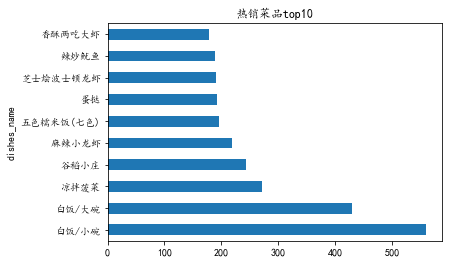

In [17]:
from pandas import DataFrame
from matplotlib.pyplot import rcParams
from matplotlib import pyplot as plt
rcParams['font.sans-serif'] = 'kaiti'
data_counts1.plot(kind='barh')
plt.title('热销菜品top10')
plt.show()

In [18]:
dict1= dict()
dict1[0]=len(data1.loc[data1['order_status'] == 0, :])/len(data1)
dict1[1]=len(data1.loc[data1['order_status'] == 1, :])/len(data1)
dict1[2]=len(data1.loc[data1['order_status'] == 2, :])/len(data1)
print(dict1)

{0: 0.009523809523809525, 1: 0.9873015873015873, 2: 0.0031746031746031746}


In [19]:
len(data)

10037

In [20]:
#白饭数据的剔除
datadetail = data.loc[data['dishes_name']!='白饭/大碗', :]
datadetail = datadetail.loc[datadetail['dishes_name']!='白饭/小碗', :]

In [21]:
#0,2数据的剔除
empid=data1.loc[data1['order_status'] != 1, 'emp_id'].tolist()
datadetail = datadetail[~datadetail['emp_id'].isin(empid)]

In [22]:
#info中未出现的数据的剔除
emid=data1.loc[:, 'emp_id'].tolist()
datadetail = datadetail[datadetail['emp_id'].isin(emid)]

In [23]:
len(datadetail)

9120

In [24]:
datadetail = datadetail[['emp_id','dishes_name']]

In [25]:
datadetail1=datadetail.groupby(by='emp_id')

In [26]:
datadetail2=datadetail1.count()
datadetail2=datadetail2.loc[datadetail2['dishes_name']>3, :]

In [27]:
datatrain=datadetail2[0:int(0.8*len(datadetail2))]
datatest=datadetail2[int(0.8*len(datadetail2)):]

In [28]:
l1=(datatrain.index).tolist()
l2=(datatest.index).tolist()
train=datadetail[datadetail['emp_id'].isin(l1)]
test=datadetail[datadetail['emp_id'].isin(l2)]

In [29]:
from pandas import DataFrame,Series
data_train=pd.crosstab(train.emp_id,train.dishes_name)

In [58]:
data_test=pd.crosstab(test.emp_id,test.dishes_name)

In [30]:
similarity= pd.DataFrame(data=None,columns=data_train.columns,index=data_train.columns)

In [ ]:
for i in range(len(similarity)):
    for j in range(similarity.shape[1]):
        da=data_train.loc[data_train.iloc[:,i]!=0,:]
        leni=len(da)
        lenj=len(data_train.loc[data_train.iloc[:,j]!=0,:])
        da=data_train.loc[data_train.iloc[:,i]!=0,:]
        lenij=len(da.loc[da.iloc[:,j]!=0,:])
        similarity.iat[i, j]=lenij/(leni+lenj-lenij)

In [48]:
l3=(similarity.columns).tolist()

In [54]:
recommend={}
for i in range(len(similarity)):
    datata=similarity.sort_values(by =l3[i],ascending=False,axis=0)[1:4].index.tolist()
    recommend[l3[i]]=datata

In [62]:
l4=(data_test.columns).tolist()
l5=(data_test.index).tolist()

In [63]:
testdic={}
for i in range(len(l5)):
    tem=[]
    for j in range(len(l4)):
        if data_test.iat[i,j]!=0:
            tem.append(l4[j])
    testdic[l5[i]]=tem

In [72]:
counts=0
for i in test.index.tolist():
    emid=test.loc[i,'emp_id']
    li=testdic[emid]
    dish=test.loc[i,'dishes_name']
    rec=recommend[dish]
    set_ = set(li) & set(rec)
    list_ = list(set_)
    if(len(list_)!=0):
        counts=counts+1

In [75]:
acc=counts/len(test)
acc

0.5032139577594124